# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     31.34
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           5.85e-08
Time:                        11:37:08   Log-Likelihood:                 351.29
No. Observations:                 244   AIC:                            -698.6
Df Residuals:                     242   BIC:                            -691.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2068      0.009     22.975      0.0

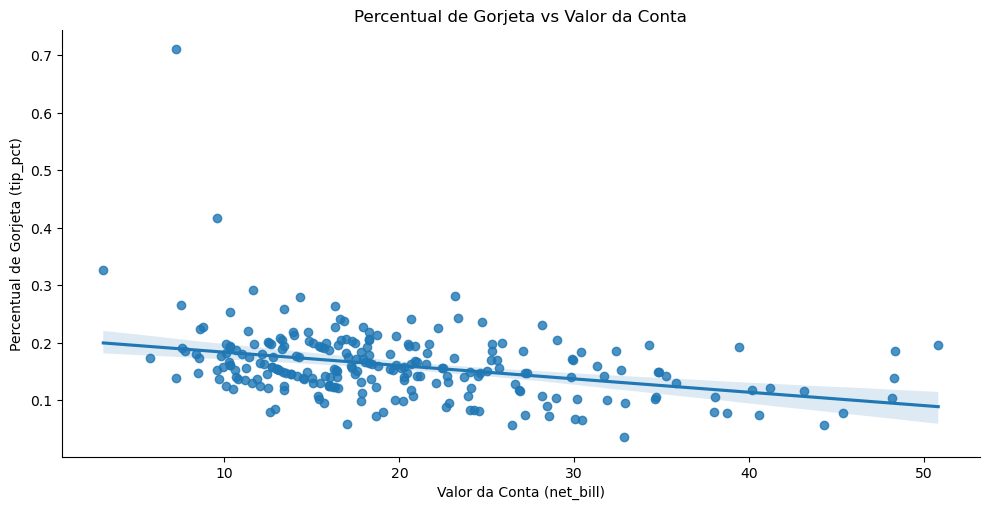

In [1]:
# Importar pacotes necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings

# Ignorar todos os warnings
warnings.filterwarnings("ignore")

# Carregar a base de dados tips
tips = sns.load_dataset("tips")

# Criar a variável de percentual de gorjeta
tips['tip_pct'] = tips['tip'] / tips['total_bill']

# Definir as variáveis X (net_bill) e Y (tip_pct)
X = tips[['total_bill']]  # net_bill, aqui representado por total_bill
y = tips['tip_pct']

# Adicionar a constante para o modelo
X = sm.add_constant(X)

# Reproduzir o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(model.summary())

# Plotar o gráfico de dispersão com a linha de regressão
sns.lmplot(x='total_bill', y='tip_pct', data=tips, aspect=2)
plt.title('Percentual de Gorjeta vs Valor da Conta')
plt.xlabel('Valor da Conta (net_bill)')
plt.ylabel('Percentual de Gorjeta (tip_pct)')
plt.show()



### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     41.48
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           6.37e-10
Time:                        11:37:12   Log-Likelihood:                 355.73
No. Observations:                 244   AIC:                            -707.5
Df Residuals:                     242   BIC:                            -700.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3146      0.024     13.023   

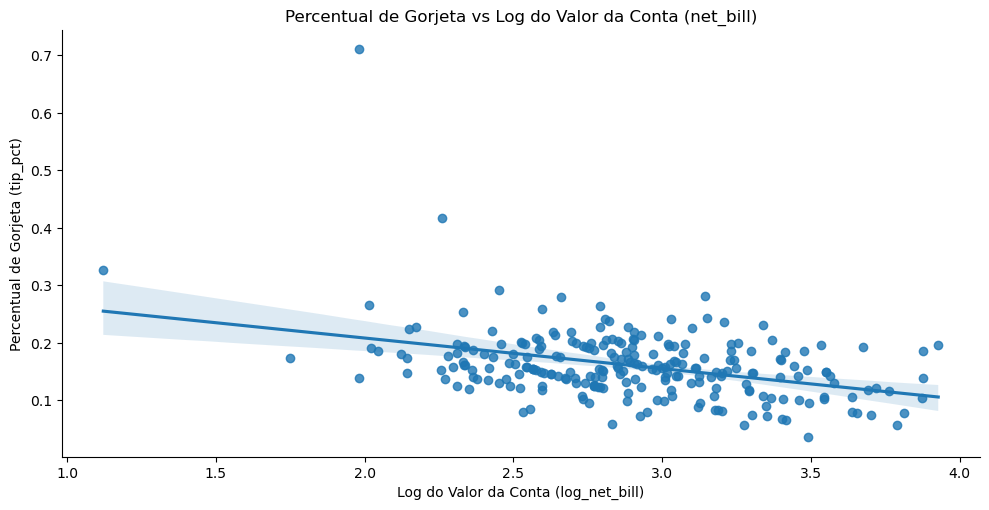

In [3]:
# Aplicar o logaritmo natural em net_bill (total_bill)
tips['log_net_bill'] = np.log(tips['total_bill'])

# Definir as variáveis X (log_net_bill) e Y (tip_pct)
X = tips[['log_net_bill']]  # Log do net_bill
y = tips['tip_pct']

# Adicionar a constante para o modelo
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear
model_log = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(model_log.summary())

# Plotar o gráfico de dispersão com a linha de regressão
sns.lmplot(x='log_net_bill', y='tip_pct', data=tips, aspect=2)
plt.title('Percentual de Gorjeta vs Log do Valor da Conta (net_bill)')
plt.xlabel('Log do Valor da Conta (log_net_bill)')
plt.ylabel('Percentual de Gorjeta (tip_pct)')
plt.show()


###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     19.65
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           1.24e-08
Time:                        11:37:16   Log-Likelihood:                 354.86
No. Observations:                 244   AIC:                            -703.7
Df Residuals:                     241   BIC:                            -693.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2525      0.019  

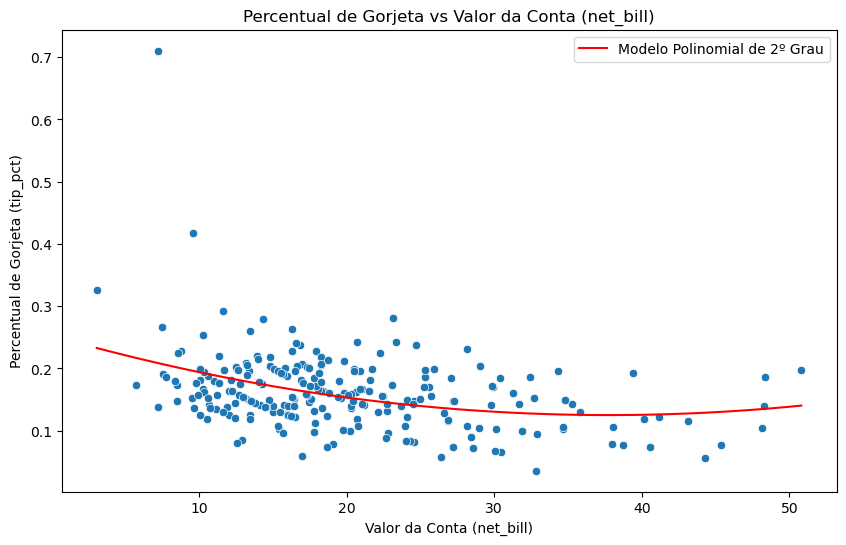

In [5]:
# Criar as variáveis para o polinômio de segundo grau em net_bill (total_bill)
tips['net_bill_squared'] = tips['total_bill'] ** 2  # Quadrado de net_bill

# Definir as variáveis X (net_bill e net_bill_squared) e Y (tip_pct)
X = tips[['total_bill', 'net_bill_squared']]
y = tips['tip_pct']

# Adicionar a constante para o modelo
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear polinomial
model_poly = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(model_poly.summary())

# Plotar o gráfico de dispersão com a curva de regressão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip_pct', data=tips)

# Criar uma série de valores de 'net_bill' para plotar a curva do modelo polinomial
import numpy as np
x_vals = np.linspace(tips['total_bill'].min(), tips['total_bill'].max(), 100)
y_vals = model_poly.params[0] + model_poly.params[1] * x_vals + model_poly.params[2] * (x_vals ** 2)

# Plotar a curva polinomial ajustada
plt.plot(x_vals, y_vals, color='red', label='Modelo Polinomial de 2º Grau')
plt.title('Percentual de Gorjeta vs Valor da Conta (net_bill)')
plt.xlabel('Valor da Conta (net_bill)')
plt.ylabel('Percentual de Gorjeta (tip_pct)')
plt.legend()
plt.show()


###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [9]:
# Criar a coluna 'net_bill' como o valor total da conta menos a gorjeta
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Adicionar uma constante ao modelo para o intercepto
X = sm.add_constant(tips['net_bill'])
y_log_tip_pct = np.log(tips['tip_pct'])

# Ajustando o modelo de regressão
model_log = sm.OLS(y_log_tip_pct, X).fit()

# Exibir o resumo do modelo
print(model_log.summary())


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     77.95
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           2.18e-16
Time:                        11:41:56   Log-Likelihood:                -55.678
No. Observations:                 244   AIC:                             115.4
Df Residuals:                     242   BIC:                             122.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5264      0.045    -33.658      0.0

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [11]:
# Criar a coluna 'net_bill' como a soma de 'total_bill' e 'tip'
tips['net_bill'] = tips['total_bill'] + tips['tip']

# Logaritmo de net_bill e tip_pct
tips['log_net_bill'] = np.log(tips['net_bill'])
tips['tip_pct'] = tips['tip'] / tips['total_bill']
y_log_tip_pct = np.log(tips['tip_pct'])

# Adicionando uma constante ao modelo para o intercepto
X_log = sm.add_constant(tips['log_net_bill'])

# Ajustando o modelo de regressão
model_log = sm.OLS(y_log_tip_pct, X_log).fit()

# Exibindo o resumo do modelo
print(model_log.summary())

# Predição no espaço logarítmico
y_pred_log = model_log.predict(X_log)

# Transformando de volta para o espaço original
y_pred_original = np.exp(y_pred_log)

# Cálculo do R² no espaço original (tip_pct)
ss_res = np.sum((tips['tip_pct'] - y_pred_original) ** 2)
ss_tot = np.sum((tips['tip_pct'] - np.mean(tips['tip_pct'])) ** 2)
r_squared_original = 1 - (ss_res / ss_tot)

print(f"R² no espaço original de tip_pct: {r_squared_original}")


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     26.18
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           6.33e-07
Time:                        11:44:28   Log-Likelihood:                -77.211
No. Observations:                 244   AIC:                             158.4
Df Residuals:                     242   BIC:                             165.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0999      0.155     -7.075   

###  6. qual modelo resultou no melhor ajuste?

O modelo 4 (log de tip_pct em função de net_bill) foi o que resultou no melhor ajuste, devido ao seu maior valor de R² (0.244), indicando que ele captura melhor a relação entre o percentual de gorjetas e o valor da conta líquida.